In [35]:
import pandas as pd
import numpy as np
from preprocess import base_data
from pathlib import Path
import hydra
import yaml
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

In [36]:
data=pd.read_pickle('../features/base_data.pkl')


C:\Users\田代雄大\AppData\Local\Temp\ipykernel_9244\3545544480.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_industrySum = industry_group.sum().sort_values('DisbursementGross', ascending=False)
C:\Users\田代雄大\AppData\Local\Temp\ipykernel_9244\3545544480.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_industryAve = industry_group.mean().sort_values('DisbursementGross', ascending=False)
C:\Users\田代雄大\AppData\Local\Temp\ipykernel_9244\3545544480.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(df_industrySum.index, rotation=30, horizontalalignmen

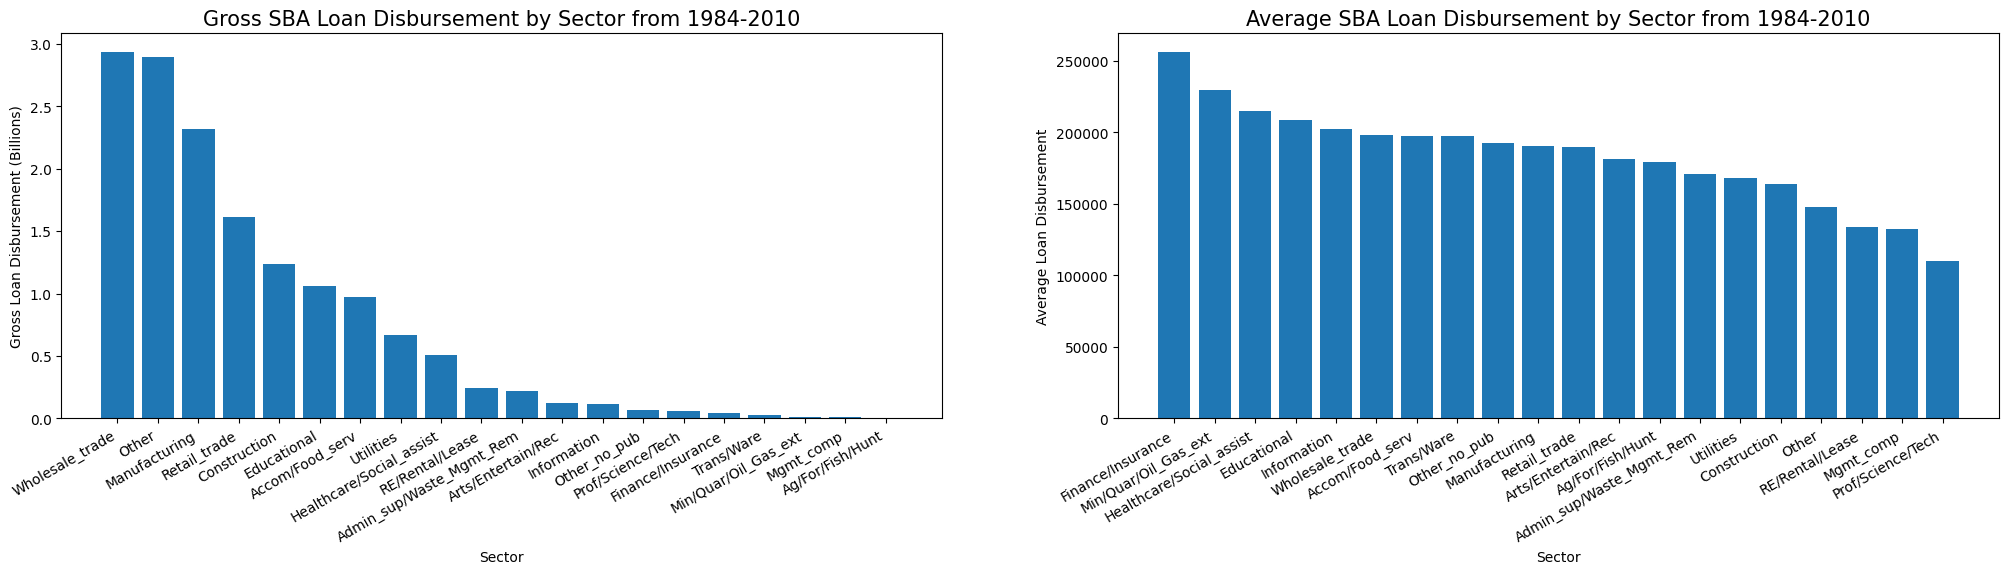

In [37]:
# Total/Average disbursed loan amount by industry
# Create a groupby object on Sector for use in visualization
industry_group = data.groupby(['Sector'])

# Data frames based on groupby by Sector looking at aggregate and average values
df_industrySum = industry_group.sum().sort_values('DisbursementGross', ascending=False)
df_industryAve = industry_group.mean().sort_values('DisbursementGross', ascending=False)

# Establish figure for placing bar charts side-by-side
fig = plt.figure(figsize=(25, 5))

# Add subplots to figure to build 1x2 grid and specify position of each subplot
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

# Bar chart 1 = Gross SBA Loan Disbursement by Sector
ax1.bar(df_industrySum.index, df_industrySum['DisbursementGross'] / 1000000000)
ax1.set_xticklabels(df_industrySum.index, rotation=30, horizontalalignment='right', fontsize=10)

ax1.set_title('Gross SBA Loan Disbursement by Sector from 1984-2010', fontsize=15)
ax1.set_xlabel('Sector')
ax1.set_ylabel('Gross Loan Disbursement (Billions)')

# Bar chart 2 = Average SBA Loan Disbursement by Sector
ax2.bar(df_industryAve.index, df_industryAve['DisbursementGross'])
ax2.set_xticklabels(df_industryAve.index, rotation=30, horizontalalignment='right', fontsize=10)

ax2.set_title('Average SBA Loan Disbursement by Sector from 1984-2010', fontsize=15)
ax2.set_xlabel('Sector')
ax2.set_ylabel('Average Loan Disbursement')

plt.show()

In [32]:
data['NewBusiness']

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
84610    0.0
84611    1.0
84612    1.0
84613    0.0
84614    1.0
Name: NewBusiness, Length: 84615, dtype: float64

ValueError: num must be an integer with 1 <= num <= 3, not 4

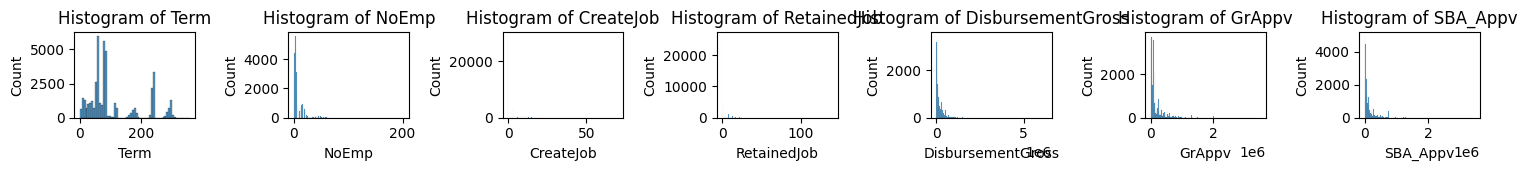

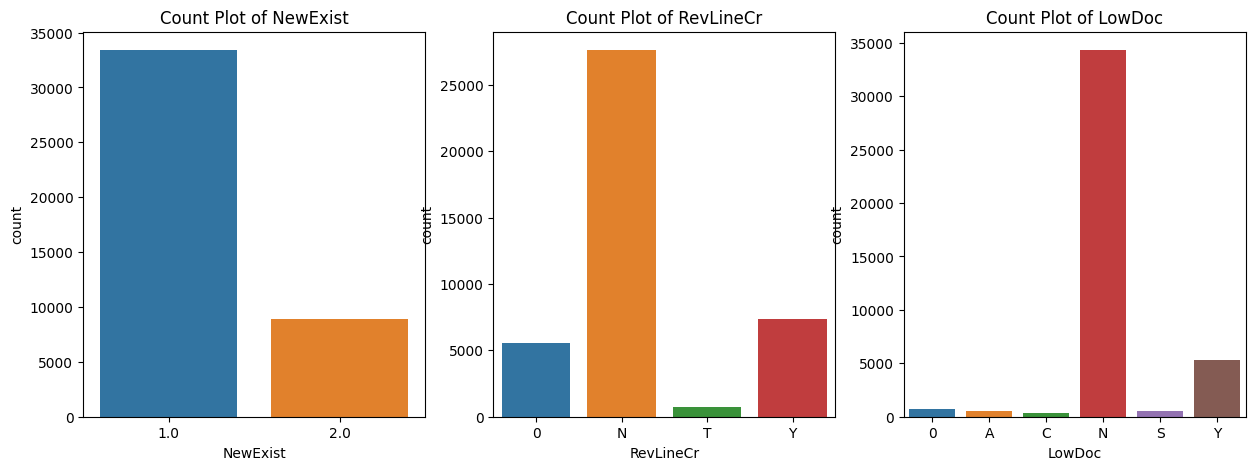

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

# 数値変数の選択
numerical_columns = ['Term', 'NoEmp', 'CreateJob', 'RetainedJob','DisbursementGross',
       'GrAppv', 'SBA_Appv']

# カテゴリ変数の選択
categorical_columns = ['NewExist', 'RevLineCr', 'LowDoc','FranchiseCode','Sector','ApprovalFY','City','State', 'BankState']

# 数値変数のヒストグラムを描画
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns):
    plt.subplot(7, 7, i + 1)
    sns.histplot(data[col], kde=False)
    plt.title(f'Histogram of {col}')
plt.tight_layout()

# カテゴリ変数のカウントプロットを描画
plt.figure(figsize=(15, 5))
for i, col in enumerate(categorical_columns):
    plt.subplot(1, 3, i + 1)
    sns.countplot(data=data, x=col)
    plt.title(f'Count Plot of {col}')
plt.tight_layout()

plt.show()

C:\Users\田代雄大\AppData\Local\Temp\ipykernel_15480\2985514473.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


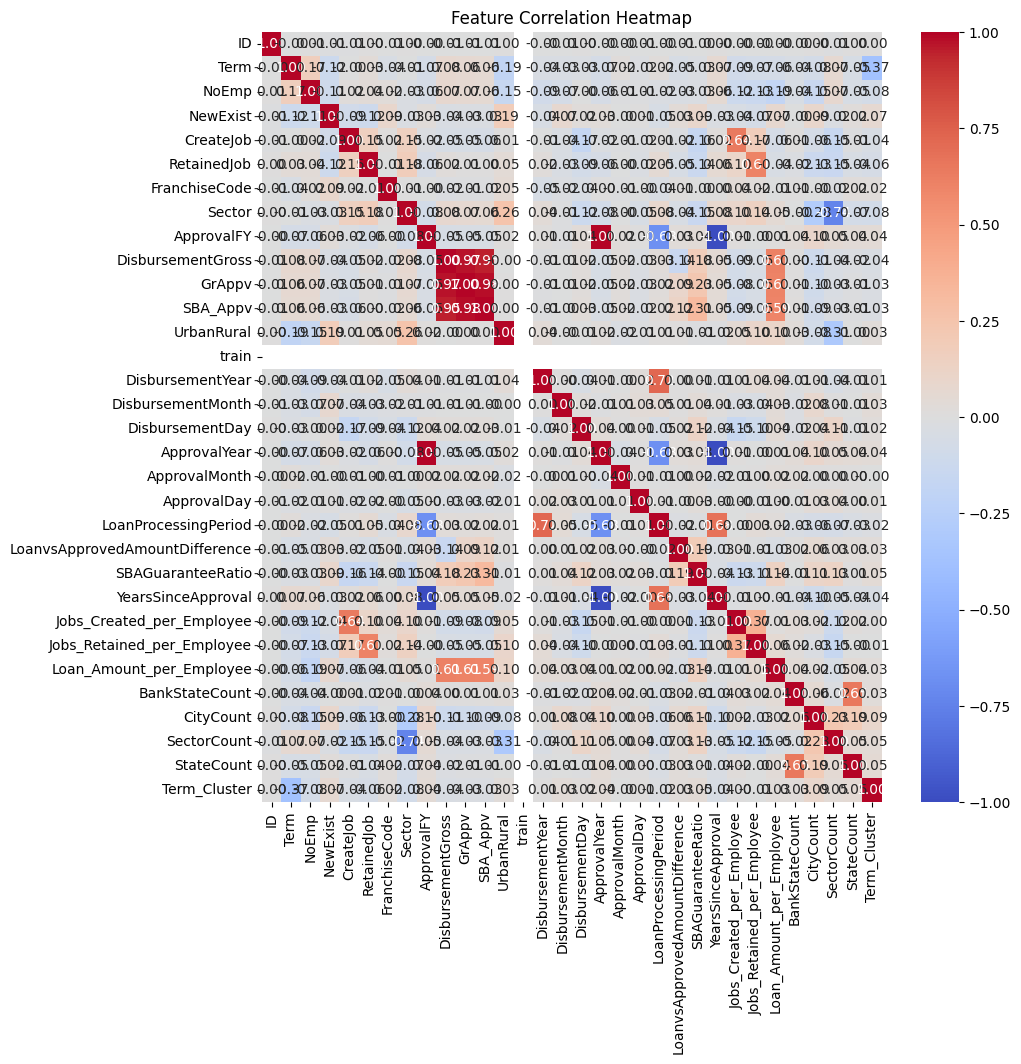

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# 相関行列の計算
correlation_matrix = data.corr()

# ヒートマップの作成
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()